In [1]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt
from plotting import CandlePlot

In [10]:
pair = "EUR_USD"
granularity = "H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")
MA_LIST = [10, 20, 50, 100, 200]

In [11]:
df.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c'],
      dtype='object')

In [12]:
df_ma = df[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c']].copy()

In [14]:
df_ma.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_10,MA_20,MA_50,MA_100,MA_200
0,2021-07-08 13:00:00+00:00,1.18514,1.18680,1.18368,1.18446,1.181607,1.183156,1.185715,1.189852,1.203936
1,2021-07-08 17:00:00+00:00,1.18448,1.18486,1.18352,1.18461,1.181830,1.183069,1.185564,1.189570,1.203754
2,2021-07-08 21:00:00+00:00,1.18444,1.18501,1.18384,1.18408,1.181996,1.182934,1.185400,1.189282,1.203567
3,2021-07-09 01:00:00+00:00,1.18406,1.18437,1.18316,1.18318,1.182156,1.182774,1.185215,1.188995,1.203374
4,2021-07-09 05:00:00+00:00,1.18320,1.18468,1.18250,1.18324,1.182478,1.182633,1.185041,1.188710,1.203179


In [13]:
for ma in MA_LIST:
    df_ma[f'MA_{ma}'] = df_ma.mid_c.rolling(window=ma).mean()
df_ma.dropna(inplace=True)
df_ma.reset_index(inplace=True, drop=True)

In [16]:
df_plot = df_ma.iloc[:500]

In [17]:
cp = CandlePlot(df_plot)

In [19]:
traces = [ f"MA_{x}" for x in MA_LIST ]

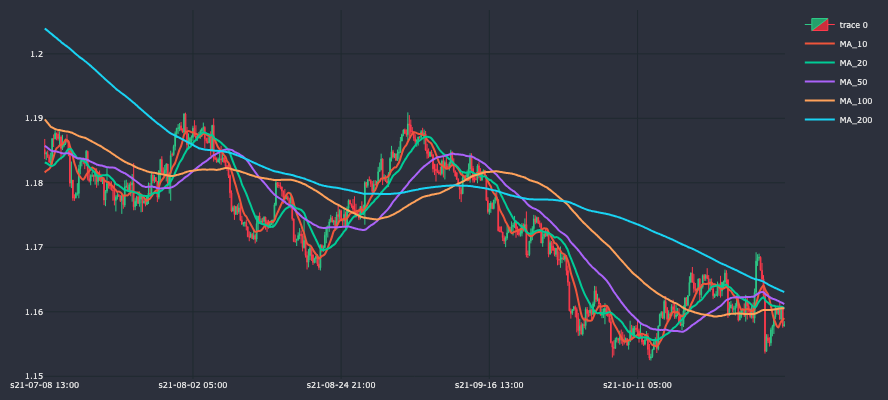

In [20]:
cp.show_plot(line_traces=traces)